In [4]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load merged dataset 

merged_dataset_url = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/processed/Merged_Training_Set.csv"
df_train = pd.read_csv("https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/processed/Merged_Training_Set.csv")

In [6]:
df_train.shape

(59400, 41)

## Understanding Feature Correlation

In [7]:
# Exploring Numerical columns

# Select only numerical columns
numerical_columns = df_train.select_dtypes(include=['number'])

# Display the first few rows of numerical data
numerical_columns

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [8]:
# Correlate status_group with Numerical Features

# Create a numeric version of status_group
status_map = {
'functional': 1,
'functional needs repair': 2,
'non functional': 0
}

df_train['status_mapped'] = df_train['status_group'].map(status_map)

In [9]:
df_train[['status_group', 'status_mapped']].head(10)

,status_group,status_mapped
0,functional,1
1,functional,1
2,functional,1
3,non functional,0
4,functional,1
5,functional,1
6,non functional,0
7,non functional,0
8,non functional,0
9,functional,1


In [10]:
# Compute correlations 

numerical_cols = [col for col in numerical_columns if col not in ['id']]  # exclude 'id'

corr_cols = numerical_cols + ['status_mapped']

correlation_table = df_train[corr_cols].corr()['status_mapped'].sort_values(ascending=False).to_frame()
correlation_table = correlation_table.rename(columns={'status_mapped': 'correlation_with_status_mapped'})

print("Correlation of numeric features (excluding 'id') with 'status_mapped':")
print(correlation_table)

Correlation of numeric features (excluding 'id') with 'status_mapped':
                   correlation_with_status_mapped
status_mapped                            1.000000
gps_height                               0.079603
latitude                                 0.045040
amount_tsh                               0.039447
population                               0.012206
construction_year                        0.009057
num_private                              0.001502
district_code                           -0.068426
longitude                               -0.081915
region_code                             -0.084491


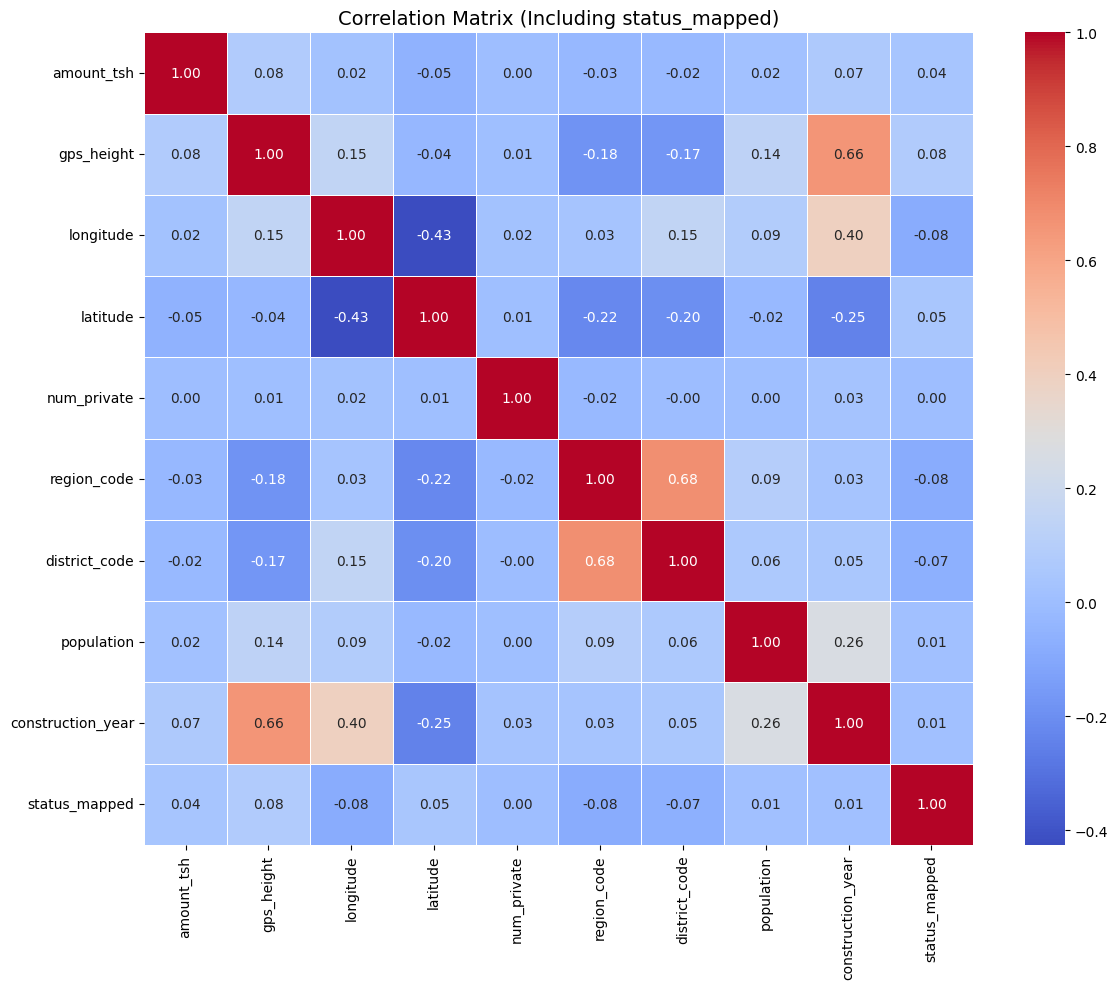

In [11]:


# Compute correlation matrix 

corr_matrix = df_train[corr_cols].corr()

# Plot heatmap with status_mapped 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix (Including status_mapped)", fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# Data cleaning 'construction_year'

# Replace 0s with NaN temporarily for processing
df_train['construction_year_cleaned'] = df_train['construction_year'].replace(0, np.nan)

#Compute mean construction year by region (ignoring NaNs)
region_means = df_train.groupby('region')['construction_year_cleaned'].mean()

region_means

region_means_rounded = region_means.round()

region_means_rounded

region
Arusha           1999.0
Dar es Salaam    2001.0
Dodoma              NaN
Iringa           1997.0
Kagera              NaN
Kigoma           1998.0
Kilimanjaro      1997.0
Lindi            1995.0
Manyara          2002.0
Mara             1997.0
Mbeya               NaN
Morogoro         1996.0
Mtwara           1992.0
Mwanza           1994.0
Pwani            2003.0
Rukwa            1990.0
Ruvuma           1997.0
Shinyanga        2003.0
Singida          1994.0
Tabora              NaN
Tanga            1993.0
Name: construction_year_cleaned, dtype: float64

In [13]:
# Replace NaN values in 'construction_year_cleaned' with the region's mean construction year
df_train['construction_year_cleaned'] = df_train.apply(
lambda row: region_means_rounded[row['region']] if pd.isna(row['construction_year_cleaned']) else row['construction_year_cleaned'],
axis=1
)

# Check the result
df_train[['region', 'construction_year', 'construction_year_cleaned']].head(30)

,region,construction_year,construction_year_cleaned
0,Iringa,1999,1999.0
1,Mara,2010,2010.0
2,Manyara,2009,2009.0
3,Mtwara,1986,1986.0
4,Kagera,0,NaN
5,Tanga,2009,2009.0
6,Shinyanga,0,2003.0
7,Shinyanga,0,2003.0
8,Tabora,0,NaN
9,Kagera,0,NaN


In [14]:
# Filter to focus on the regions of interest: Dodoma, Kagera, Mbeya, Tabora

regions_of_interest = ['Dodoma', 'Kagera', 'Mbeya', 'Tabora']
filtered_region_df = df_train[df_train['region'].isin(regions_of_interest)]

filtered_region_df



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_mapped,construction_year_cleaned
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,NaN
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0,NaN
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,NaN
27,20145,0.0,2011-07-11,Hesawa,0,DWE,31.104257,-1.735361,Kwawilliam,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,NaN
30,46804,0.0,2011-03-23,Water,0,Water,36.108312,-5.791000,Ngosi,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,...,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0,NaN
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0,NaN
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,insufficient,insufficient,dam,dam,surface,other,other,functional,1,NaN
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,1,NaN


In [15]:
unique_values = filtered_region_df['construction_year'].unique()

unique_values

array([0], dtype=int64)

In [16]:
# Finding the earliest construction year excluding 0

earliest_construction_year = df_train[df_train['construction_year'] != 0]['construction_year'].min()

# Create a new column to track if the 'construction_year' was imputed
df_train['construction_year_imputed'] = (df_train['construction_year'].isna() | (df_train['construction_year'] == 0))
print("The earliest construction year excluding 0 is:", earliest_construction_year)

The earliest construction year excluding 0 is: 1960


In [17]:
# Replace NaN or 0 values in 'construction_year' with 1960 for specific regions

df_train.loc[(df_train['region'].isin(regions_of_interest)) & 
((df_train['construction_year_cleaned'].isna()) | (df_train['construction_year_cleaned'] == 0)), 
'construction_year_cleaned'] = 1960

# Check the first few rows to ensure the imputation and new column are correct
df_train[['region', 'construction_year_cleaned']].head(30)

,region,construction_year_cleaned
0,Iringa,1999.0
1,Mara,2010.0
2,Manyara,2009.0
3,Mtwara,1986.0
4,Kagera,1960.0
5,Tanga,2009.0
6,Shinyanga,2003.0
7,Shinyanga,2003.0
8,Tabora,1960.0
9,Kagera,1960.0


In [18]:
# Check unique values for each region in the 'construction_year_cleaned' column
unique_values_by_region = df_train.groupby('region')['construction_year_cleaned'].unique()

# Print the unique values for each region
unique_values_by_region

region
Arusha           [2000.0, 2009.0, 2002.0, 1974.0, 2011.0, 2004....
Dar es Salaam    [2001.0, 1970.0, 2010.0, 2000.0, 1980.0, 1990....
Dodoma                                                    [1960.0]
Iringa           [1999.0, 1978.0, 1992.0, 2008.0, 2003.0, 1986....
Kagera                                                    [1960.0]
Kigoma           [2009.0, 2002.0, 1985.0, 2004.0, 2006.0, 2007....
Kilimanjaro      [2009.0, 2011.0, 1974.0, 2000.0, 2002.0, 1972....
Lindi            [2011.0, 2006.0, 1987.0, 2010.0, 1995.0, 1978....
Manyara          [2009.0, 2000.0, 2008.0, 2004.0, 2012.0, 2010....
Mara             [2010.0, 1991.0, 2002.0, 2000.0, 1997.0, 2008....
Mbeya                                                     [1960.0]
Morogoro         [1995.0, 2004.0, 1997.0, 1974.0, 1972.0, 1996....
Mtwara           [1986.0, 2004.0, 2011.0, 2006.0, 1975.0, 1974....
Mwanza           [1999.0, 1994.0, 1982.0, 2011.0, 2002.0, 2001....
Pwani            [2011.0, 2004.0, 2003.0, 2008.0, 1987.

In [19]:
# Compute correlation again to see if there is a change in correlation between construction_year_cleaned and status mapped


numerical_cols = [col for col in numerical_columns if col not in ['id']]  # exclude 'id'

corr_cols = numerical_cols + ['status_mapped']

correlation_table = df_train[corr_cols].corr()['status_mapped'].sort_values(ascending=False).to_frame()
correlation_table = correlation_table.rename(columns={'status_mapped': 'correlation_with_status_mapped'})

print("Correlation of numeric features (excluding 'id') with 'status_mapped':")
print(correlation_table)

Correlation of numeric features (excluding 'id') with 'status_mapped':
                   correlation_with_status_mapped
status_mapped                            1.000000
gps_height                               0.079603
latitude                                 0.045040
amount_tsh                               0.039447
population                               0.012206
construction_year                        0.009057
num_private                              0.001502
district_code                           -0.068426
longitude                               -0.081915
region_code                             -0.084491


In [20]:
# 1. Compute correlation between 'construction_year_cleaned' and 'status_mapped'

correlation_construction_status = df_train['construction_year_cleaned'].corr(df_train['status_mapped'])

print(f"Correlation between construction_year_cleaned and status_mapped: {correlation_construction_status}")

Correlation between construction_year_cleaned and status_mapped: 0.11731283052856112


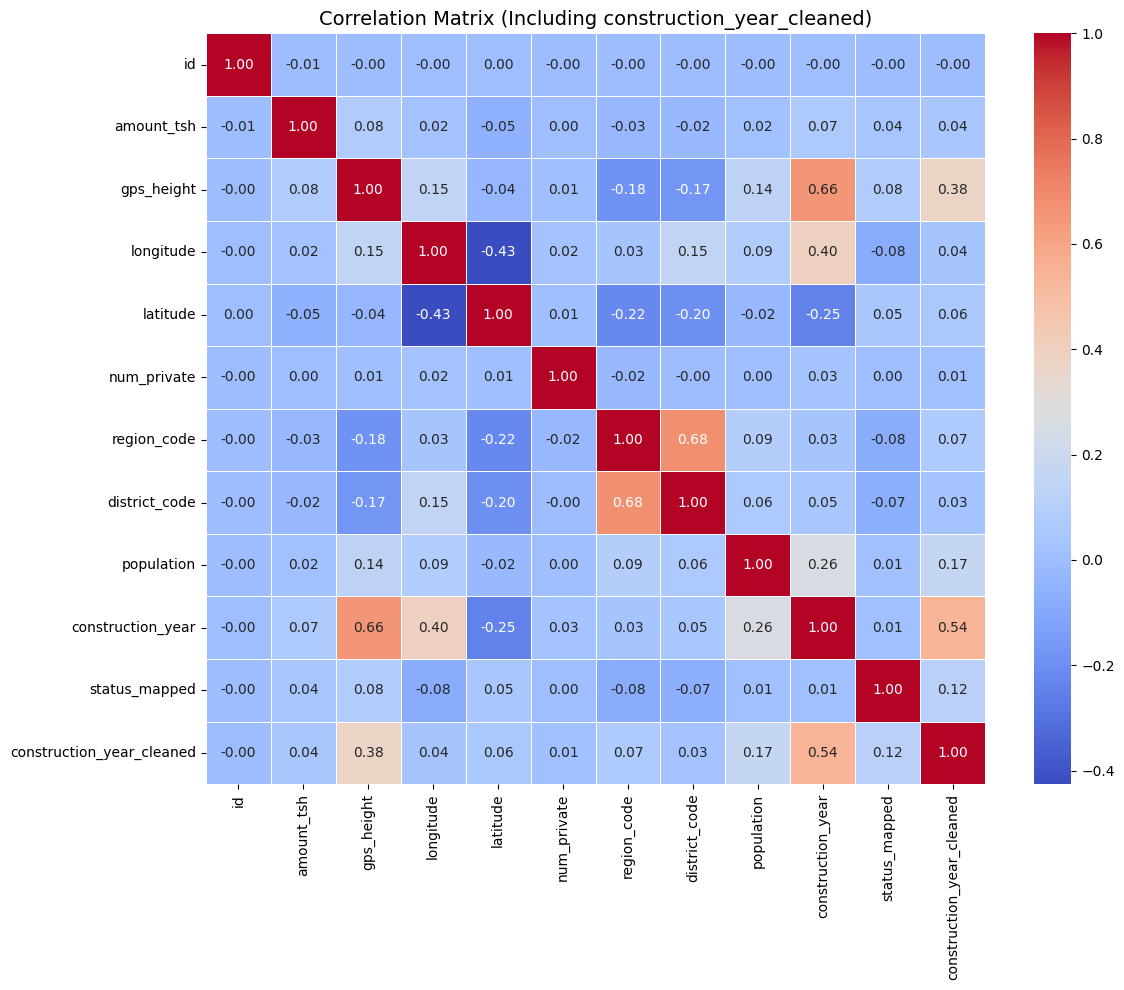

In [21]:
# Add 'construction_year_cleaned' to the numerical columns and compute the new correlation matrix
numerical_columns = df_train.select_dtypes(include=['number']).columns
numerical_columns_with_construction_year = numerical_columns.tolist() + ['construction_year_cleaned']

# Calculate the correlation matrix including 'construction_year_cleaned'
correlation_matrix = df_train[numerical_columns].corr()

# Plot heatmap with construction_year_cleaned 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix (Including construction_year_cleaned)", fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import chi2_contingency

In [23]:
# Create a contingency table
contingency_table = pd.crosstab(df_train['construction_year_cleaned'], df_train['status_group'])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequency Table:\n{expected}")

# Interpretation of the p-value
if p < 0.05:
    print("\nThere is a significant relationship between cleaned construction year and status group.")
else:
    print("\nThere is no significant relationship between cleaned construction year and status group.")

Contingency Table:
status_group               functional  functional needs repair  non functional
construction_year_cleaned                                                     
1960.0                           5927                     1068            5222
1961.0                              2                        3              16
1962.0                              7                        1              22
1963.0                             31                        6              48
1964.0                              7                        1              32
1965.0                             11                        1               7
1966.0                              6                        0              11
1967.0                             31                       17              40
1968.0                             22                        4              51
1969.0                             15                        3              41
1970.0                           

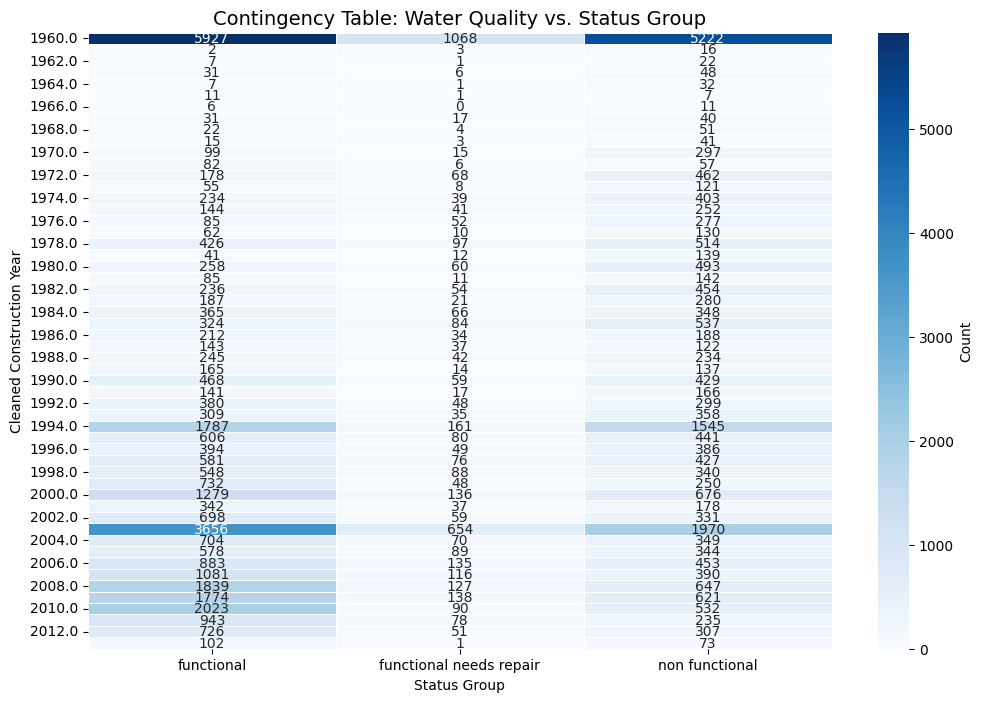

In [28]:
# Create a heatmap to visualize the contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5, cbar_kws={'label': 'Count'})

# Add title and labels
plt.title('Contingency Table: Water Quality vs. Status Group', fontsize=14)
plt.xlabel('Status Group')
plt.ylabel('Cleaned Construction Year')

# Display the plot
plt.show()

In [24]:
# Remove decided categorical columns

df_train_dropped = df_train.drop(['wpt_name', 'recorded_by', 'scheme_name'], axis=1)

df_train_dropped.shape

(59400, 41)

In [25]:
# Display all categorical columns

categorical_columns = df_train_dropped.select_dtypes(include=['object', 'category']).columns

print("Categorical columns in the dataset:", categorical_columns)

Categorical columns in the dataset: Index(['date_recorded', 'funder', 'installer', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


funder installer grouping and see commonalities 